# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## Is the distribution of body temperatures normal?

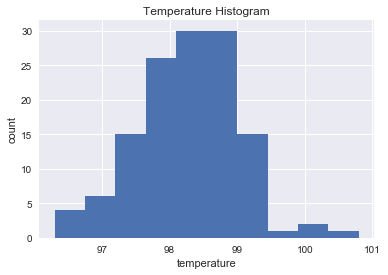

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set()
plt.hist(df.temperature)
plt.title('Temperature Histogram')
plt.xlabel('temperature')
plt.ylabel('count')

# Show histogram
plt.show()

From the histogram of normal body temperatures above, the figure is quite similar to bell curve which means is approximately normally distributed. In order to further prove our points here, we would like to use QQ plot and Shapiro-Wilk test to test the normality of the temperature dataset:

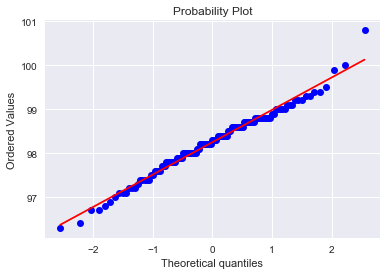

In [15]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

The points in the Q-Q plot lies approximately in a line which means it follows normal distribution from the graphical method, let us take a look at more formal normalilty test Shapiro-Wilk:

In [17]:
stats.shapiro(df.temperature)

(0.9865770936012268, 0.233174666762352)

The P value for the Shapiro-Wilk test is around 0.23317 which means we failed to reject the null hypothesis that the data follows normal distribution. With both graphical and statistically provement above, we would say the data is from normal distribution.

## Is the sample size large? Are the observations independent?

Yes, there are 130 entries in the dataset, it's big enough to apply CLT or further statistical tests. It's hard to verify the independence of the observations, but as long as the observations are collected independently, it should be fine.

## Is the true population mean really 98.6 degrees F?

We will make the null hypothesis test that:

H0: The true population mean is 98.6 degrees 

H1: The true population mean is not equal to 98.6 degrees

#### Bootstrap hypothesis test:

In [122]:
replicates = np.empty(10000)
for i in range(10000):
    sample = np.random.choice(df.temperature, size=len(df.temperature))
    replicates[i] = np.mean(sample)
print(np.mean(replicates))
p = np.sum(replicates >= 98.6) / 10000
print(p)

98.2507401538
0.0


#### Statistical testing:

We are supposed to use one-sample t test here since we are comparing the sample with a certain number and the population variance is not known beforehand, the result is like below:

In [123]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Alternatively if we are using the one-sample z test, the result is:

In [143]:
stdev = np.std(df.temperature, ddof = 1)
z_score = (98.6 - np.mean(df.temperature)) / (stdev / np.sqrt(len(df.temperature)))
p_value = scipy.stats.norm.sf(abs(z_score))*2 
print(p_value)

4.9021570141e-08


Actually even if when we are using z test here, the result is pretty aligned with the previous z test. The reason is that 
when sample size is large, z test is a good approximation of t test ,so is the final result for our case.

From both bootstrap approach and statistical approach, we can see there is strong evidence that we should reject the null hypothesis that the true population mean is equal to 98.6 degrees.

## Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [162]:
import random
random.seed(321)
sample = np.random.choice(df.temperature, size = 10, replace = False)

In [163]:
sample

array([ 99.3,  96.7,  97.9,  98.7,  96.9,  97.9,  98.4,  98.2,  99.1,  99. ])

In [168]:
stdev = np.std(sample, ddof = 1)
z_score = (98.6 - np.mean(sample)) / stdev * np.sqrt(10)
p_value = scipy.stats.norm.sf(abs(z_score))*2 
print(p_value)

0.164050888061


In [169]:
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-1.3915758106071743, pvalue=0.19748288632507544)

### Question!!!!
Actually the ztest and ttest results are pretty similar, although the pvalue for z test is always bigger than ttest. 
We found for our current case the result shows we fail to result the null hypothesis that the degree is 98.6 here. For
number of observations is small, we are supposed to use t statistics here.

## At what temperature should we consider someone's temperature to be "abnormal"?

In [171]:
# frequentist approach:
a = df.temperature
stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))

(98.122002905608014, 98.376458632853485)

In [179]:
# manual way for above
tvalue = stats.t.ppf(1-0.025, len(a) - 1)
margin_of_error = tvalue * np.std(a, ddof = 1) / np.sqrt(len(a))
[np.mean(a) - margin_of_error, np.mean(a) + margin_of_error]

[98.122002905608014, 98.376458632853485]

In [184]:
# bootstrap approach
ci_replicates = np.empty(10000)
for i in range(10000):
    replicate = np.mean(np.random.choice(a, len(a)))
    ci_replicates[i] = replicate
np.percentile(ci_replicates, [2.5, 97.5])

array([ 98.12384615,  98.37232692])

So the results from the two approaches are pretty close, then most of people's temperature fall into [98.12, 98.37] which means
if someone's temperature is outside of the range, we would like to consider his/her temperature to be abnormal.

## Is there a significant difference between males and females in normal temperature?

In [185]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [196]:
men_df = list(df.loc[df.gender == 'M', 'temperature'])
women_df = list(df.loc[df.gender == 'F', 'temperature'])

In [200]:
type(women_df)

list

In [202]:
np.mean(women_df)

98.393846153846141

In [203]:
np.mean(men_df)

98.104615384615371

In [204]:
stats.ttest_ind(men_df,women_df)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

After performing the two sample t test for men's and women's temperatures, with the significance level as 0.05, we are confident 
that there is a difference between male and female in normal temperature.  
Since there is a difference between the two genders, we would like to consider the normal temperature separately for
male and female, the 95% confidence interval for both genders are:

In [205]:
stats.t.interval(0.95, len(men_df)-1, loc=np.mean(men_df), scale=stats.sem(men_df))

(97.931472184457022, 98.277758584773721)

In [206]:
stats.t.interval(0.95, len(women_df)-1, loc=np.mean(women_df), scale=stats.sem(women_df))

(98.20961890918224, 98.578073398510043)

So each gender outside of the corresponding inteval range, we would like to identify it to be abnormal here.